# Workflow in a nutshell
* Generate periodic time-series for training and test set
* Tune the hyperparameters of peak detector based on training set
* Test the found paramters w/ test set
* Generate a new kind of time-series, and apply previous peak detector directly
* Re-tune the peak detector

* Generate periodic time-series for training and test set


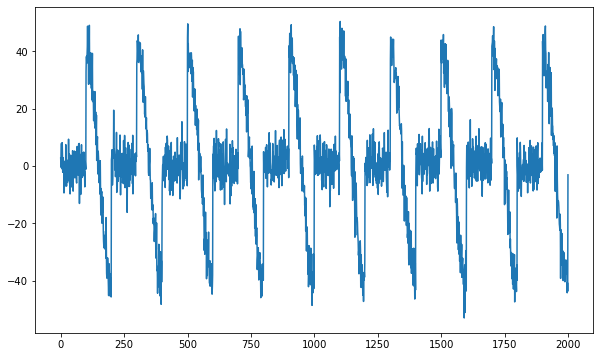

In [18]:
## Code comes from Coursera course: Sequences, Time Series and Prediction
import numpy as np
import matplotlib.pyplot as plt

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.5,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(10 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

def generate_data(peaks_number=10, baseline=0, period=200, amplitude=40, slope=0.0, noise_level=5):
    time = np.arange(peaks_number * period + 1, dtype="float32")
    series = trend(time, slope)  

    # Create the series
    series = baseline + trend(time, slope) + seasonality(time, period=200, amplitude=amplitude, phase=100)
    # Update with noise
    series += noise(time, noise_level, seed=42)
    return series

training_set = generate_data(peaks_number=10)
test_set = generate_data(peaks_number=20)

plt.figure(figsize=(10, 6))
plt.plot(training_set)
plt.show()

## Dump the numpy array into csv


In [20]:
import pandas as pd
pd.DataFrame(training_set).to_csv("training_set1.csv", header=None)
pd.DataFrame(test_set).to_csv("test_set1.csv", header=None)


## Compile limbo 